In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.manifold import TSNE
import seaborn as sns

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_color_z = pd.read_csv(os.path.join(folder_path, "features_color_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_color_mm = pd.read_csv(os.path.join(folder_path, "features_color_all_minmax.csv"))

In [3]:
df_color_z

,rgb_mean_r,rgb_mean_g,rgb_mean_b,hue,saturation,brightness,filename,label
0,-0.233010,-0.187437,0.459739,0.173814,-0.908055,-0.258016,callo_1.png,smaller
1,1.161184,1.758276,2.314469,3.173069,-2.630162,1.450514,callo_10.png,smaller
2,-0.077739,-0.327588,-0.860146,-0.718451,0.927561,-0.160670,callo_100.png,smaller
3,0.397788,0.356639,-0.399265,-0.373024,0.458052,0.338521,callo_101.png,smaller
4,-0.030227,0.228967,-0.358905,-0.064264,0.141367,-0.045647,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,0.532051,0.649749,0.620998,0.893369,-0.410392,0.602273,callo_95.png,higher
533,-0.084669,-0.200543,-0.284272,0.014286,0.361934,-0.105928,callo_96.png,higher
534,0.012455,0.107445,0.180020,1.284708,-0.041958,0.114134,callo_97.png,higher
535,1.174102,1.542969,1.756730,2.768508,-1.294443,1.430725,callo_98.png,higher


In [4]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_z_cl= df_color_z.drop(columns=['filename', 'label'])

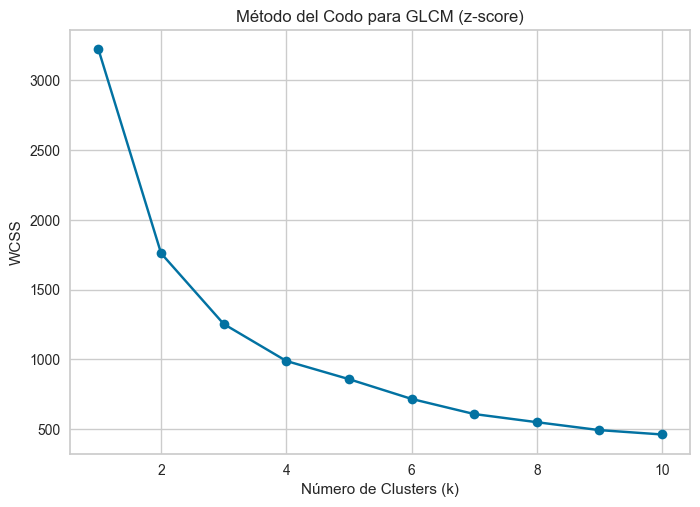

In [5]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_color_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

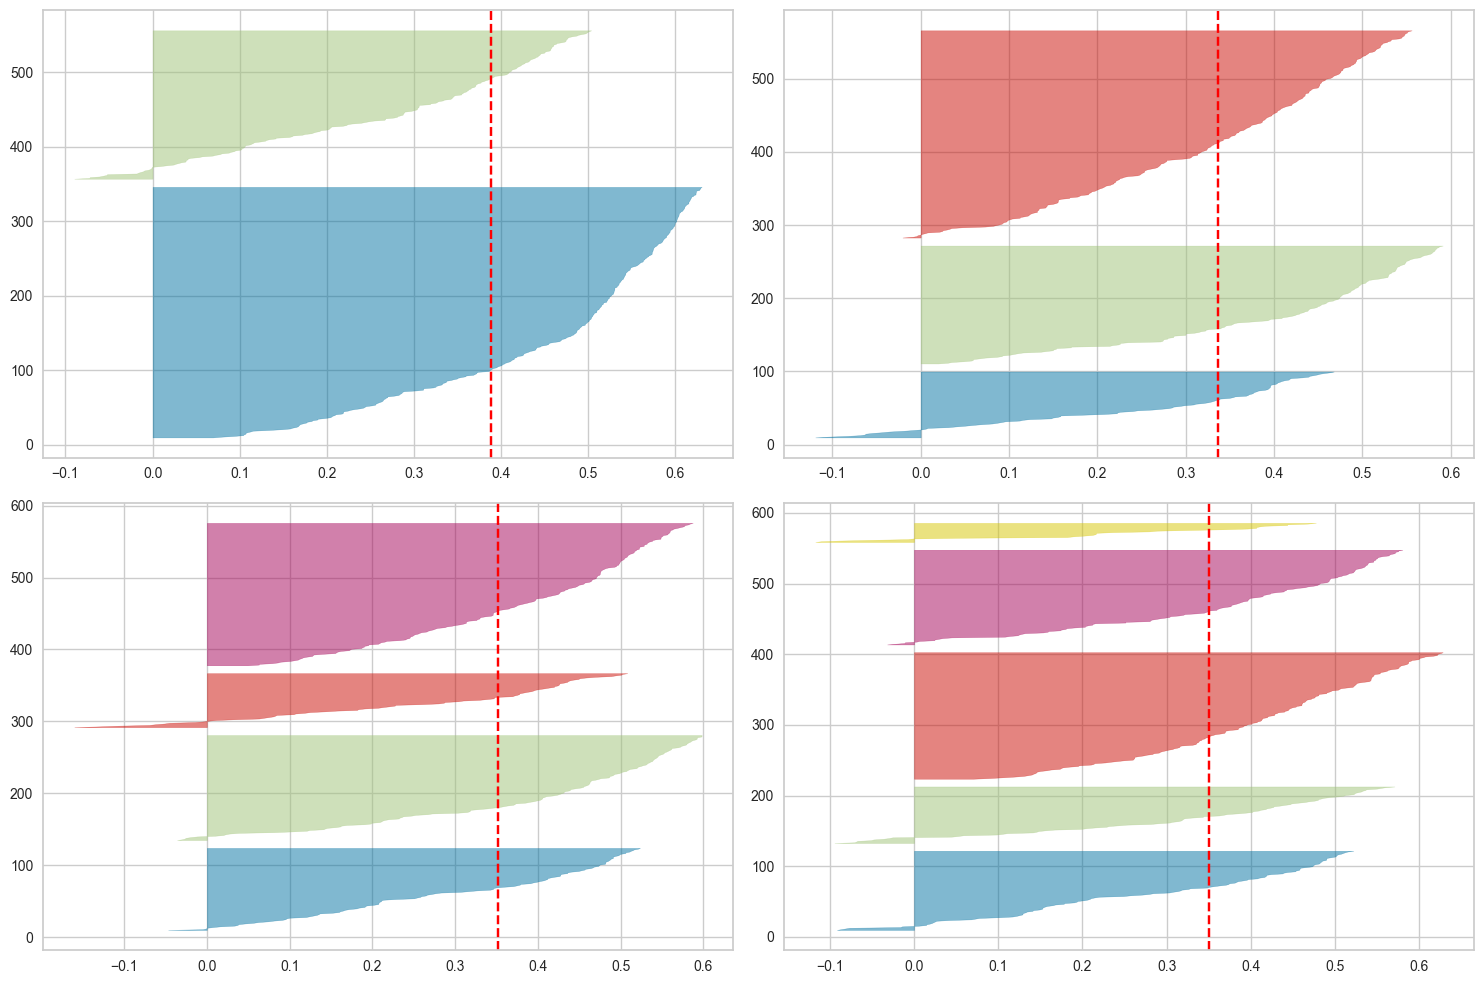

In [6]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_color_z_cl)  

plt.tight_layout()
plt.show()

In [7]:
#Modelo k-means
cluster_color_z= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_color_z.fit(df_color_z_cl)  

KMeans(n_clusters=2, random_state=42)

In [8]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_color_z['Cluster'] = cluster_color_z.labels_
pd.crosstab(df_color_z['Cluster'], df_color_z['label'])

label,higher,smaller
Cluster,,
0,88,110
1,180,159


In [9]:
silhouette_avg_color_z = silhouette_score(df_color_z_cl, cluster_color_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_color_z}')

Índice de silueta promedio: 0.38989862794402247


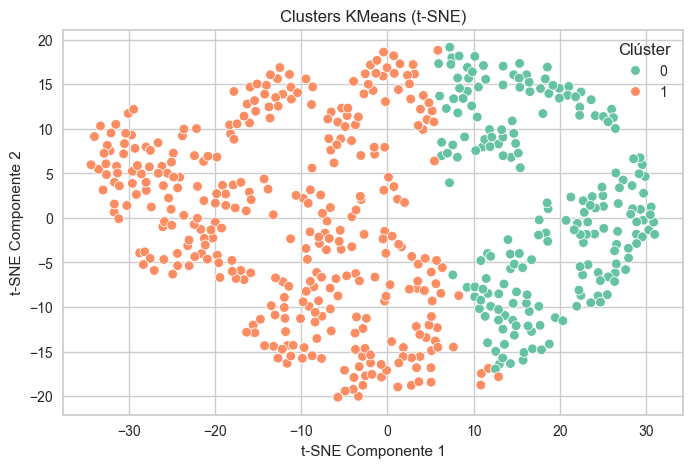

In [10]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_color_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_color_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


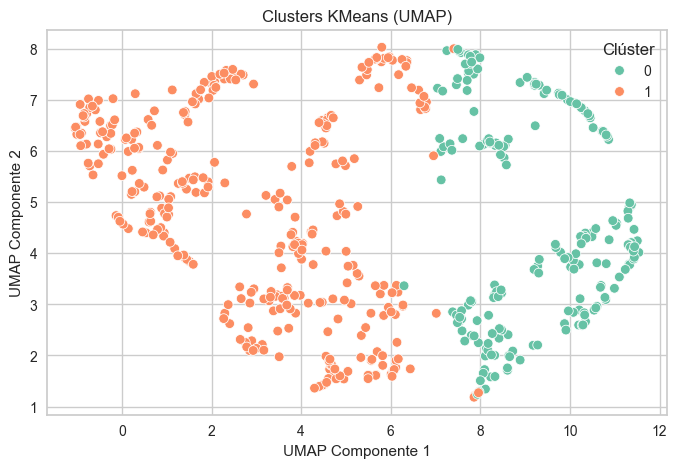

In [11]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_color_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_color_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

min-max:

In [12]:
df_color_mm

,rgb_mean_r,rgb_mean_g,rgb_mean_b,hue,saturation,brightness,filename,label
0,0.440105,0.393041,0.439045,0.273324,0.477307,0.426557,callo_1.png,smaller
1,0.676072,0.737430,0.757597,0.813895,0.193758,0.722556,callo_10.png,smaller
2,0.466384,0.368235,0.212354,0.112506,0.779546,0.443422,callo_100.png,smaller
3,0.546867,0.489342,0.291511,0.174764,0.702240,0.529906,callo_101.png,smaller
4,0.474426,0.466744,0.298442,0.230414,0.650097,0.463349,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,0.569591,0.541222,0.466742,0.403013,0.559248,0.575600,callo_95.png,higher
533,0.465211,0.390721,0.311261,0.244571,0.686414,0.452906,callo_96.png,higher
534,0.481650,0.445235,0.391003,0.473546,0.619912,0.491031,callo_97.png,higher
535,0.678258,0.699321,0.661805,0.740979,0.413687,0.719127,callo_98.png,higher


In [13]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_mm_cl= df_color_mm.drop(columns=['filename', 'label'])

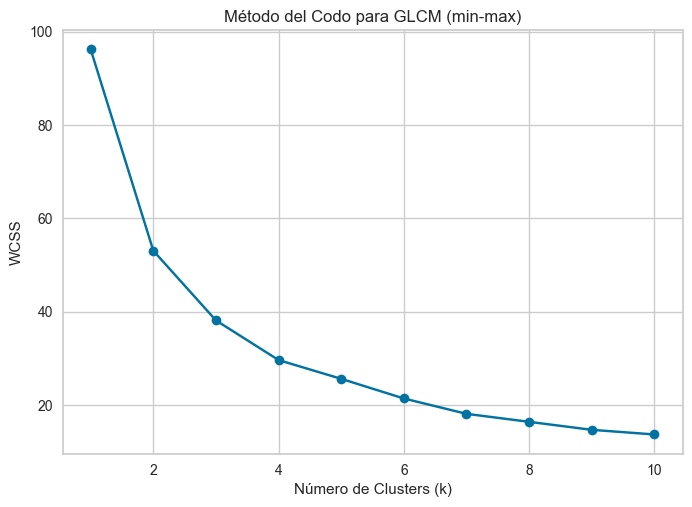

In [14]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_color_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-max)')
plt.grid(True)
plt.show()

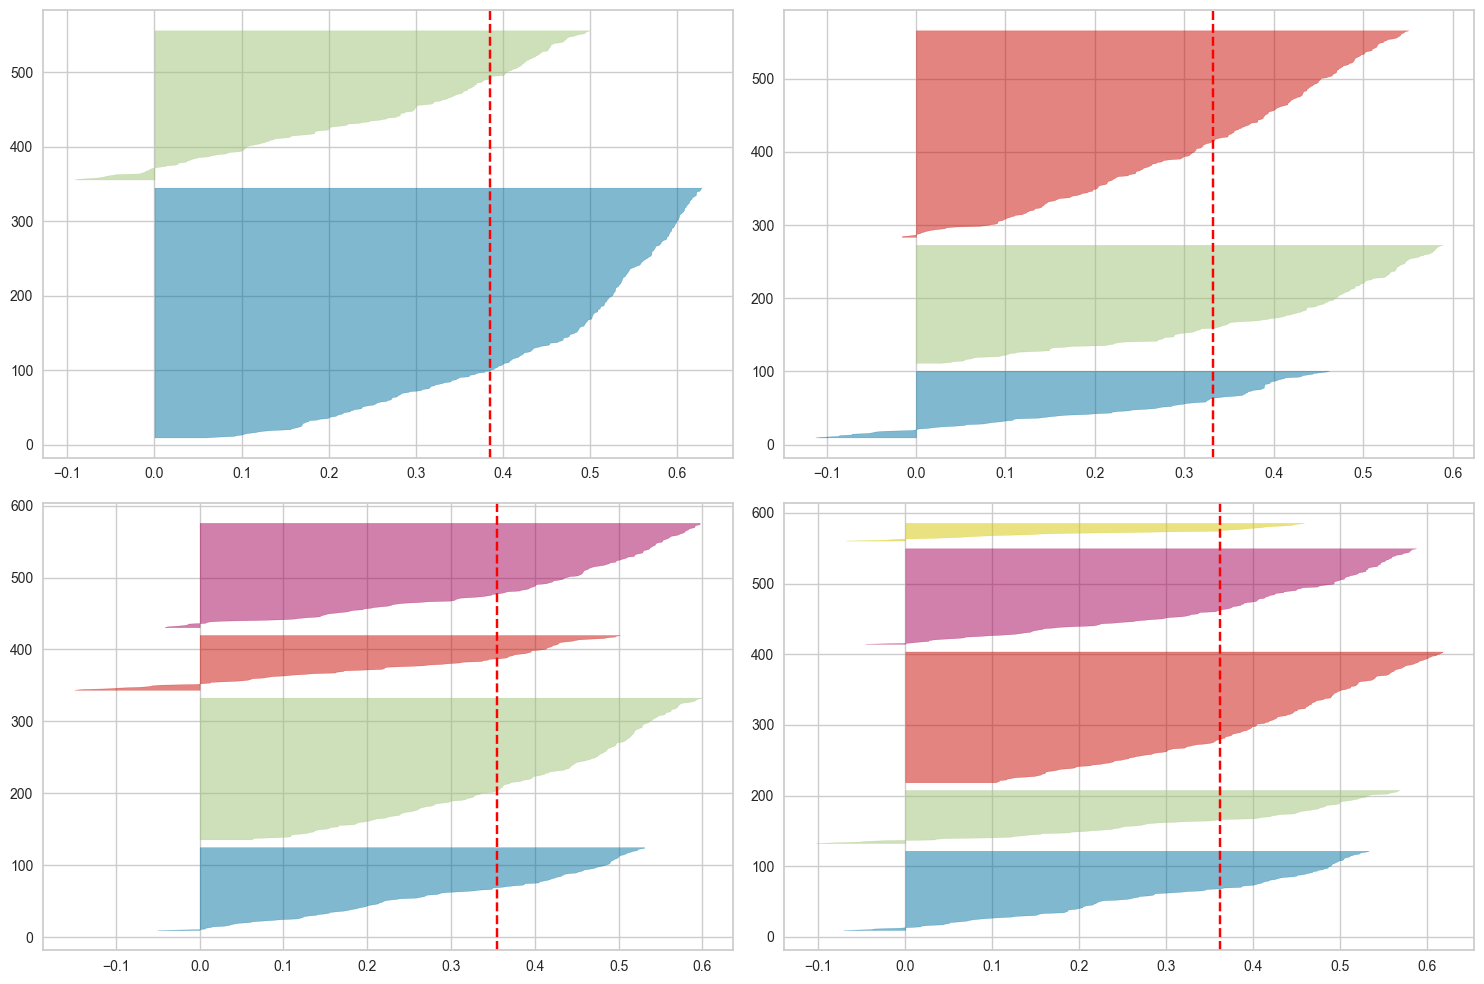

In [15]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_color_mm_cl)  

plt.tight_layout()
plt.show()

In [16]:
#Modelo k-means
cluster_color_mm= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_color_mm.fit(df_color_mm_cl)   

KMeans(n_clusters=2, random_state=42)

In [17]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_color_mm['Cluster'] = cluster_color_mm.labels_
pd.crosstab(df_color_mm['Cluster'], df_color_mm['label'])

label,higher,smaller
Cluster,,
0,88,111
1,180,158


In [18]:
silhouette_avg_color_mm = silhouette_score(df_color_mm_cl, cluster_color_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_color_mm}')

Índice de silueta promedio: 0.3865076931431332


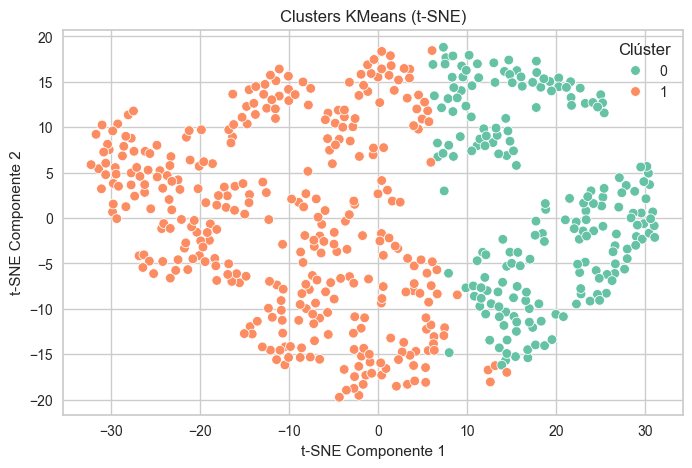

In [19]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_color_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_color_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


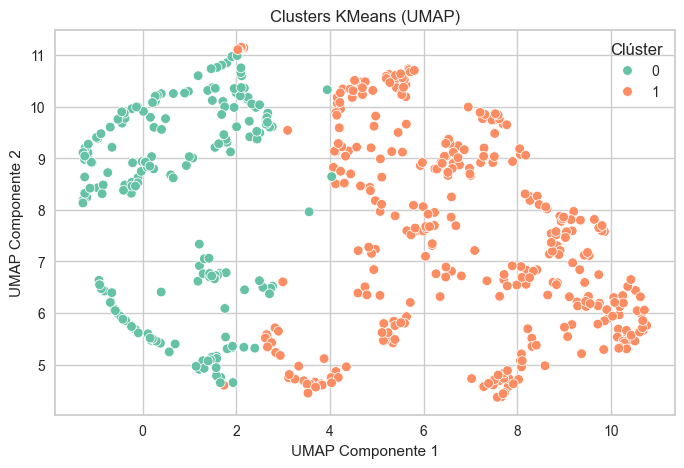

In [31]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_color_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_color_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

umap
zscore

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


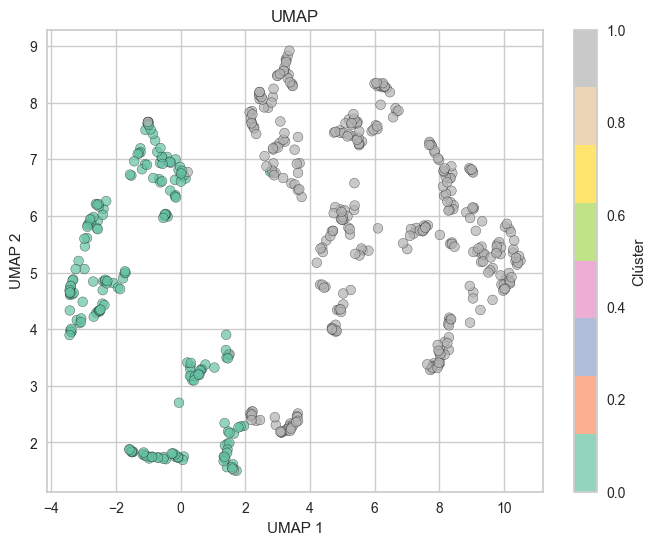

In [20]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_zscore = umap.UMAP(n_neighbors= 11, n_components=2,min_dist=0.01, random_state=42)  
X_umap_zscore = umap_model_zscore.fit_transform(df_color_z_cl)


plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_zscore[:, 0], X_umap_zscore[:, 1],
    c=df_color_z['Cluster'], cmap='Set2', edgecolor='k', alpha=0.7
)
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

In [21]:
#Modelo k-means
cluster_color_z_umap= KMeans(init='k-means++',n_clusters=4,random_state=42)
cluster_color_z_umap.fit(X_umap_zscore) 

KMeans(n_clusters=4, random_state=42)

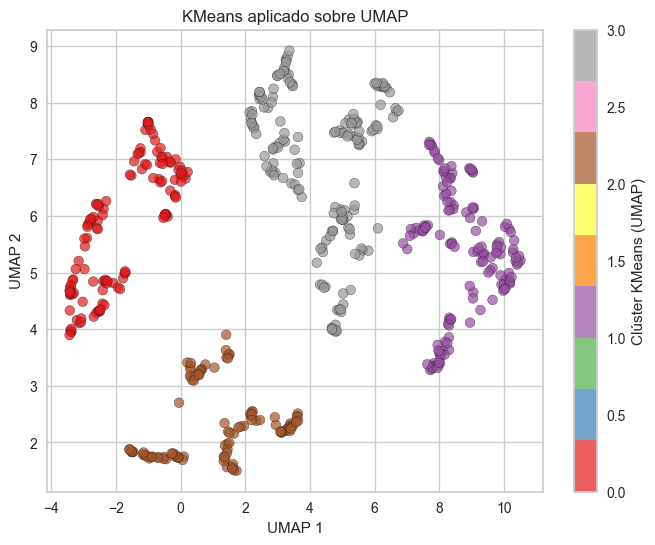

In [22]:
# Añadir los nuevos clusters al DataFrame original
df_color_z['Cluster_UMAP'] = cluster_color_z_umap.labels_

# Visualización con los nuevos clústeres
plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_zscore[:, 0], X_umap_zscore[:, 1],
    c=df_color_z['Cluster_UMAP'], cmap='Set1', edgecolor='k', alpha=0.7
)
plt.title('KMeans aplicado sobre UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster KMeans (UMAP)')
plt.grid(True)
plt.show()

In [23]:
pd.crosstab(df_color_z['label'], df_color_z['Cluster_UMAP'])

Cluster_UMAP,0,1,2,3
label,,,,
higher,55,86,48,79
smaller,72,52,58,87


In [24]:
silhouette_umap = silhouette_score(X_umap_zscore, cluster_color_z_umap.labels_)
print(f"Índice de silueta (UMAP + KMeans): {silhouette_umap:.3f}")


Índice de silueta (UMAP + KMeans): 0.554


minmax

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


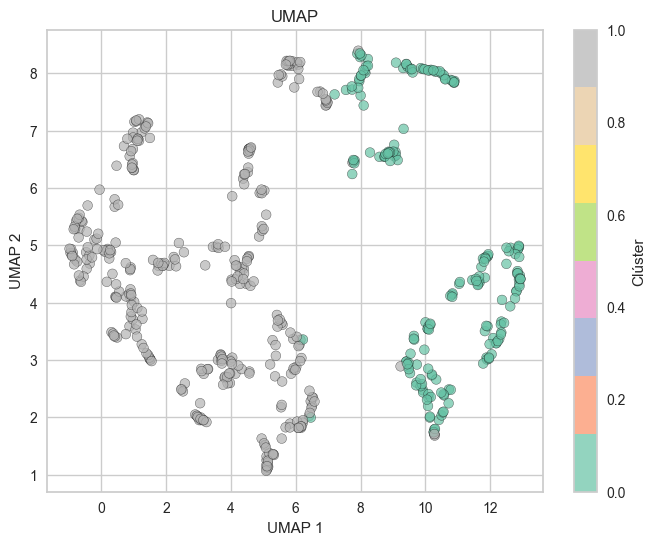

In [25]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 11, n_components=2,min_dist=0.01, random_state=42)  #9
X_umap_mm = umap_model_mm.fit_transform(df_color_mm_cl)


plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_mm[:, 0], X_umap_mm[:, 1],
    c=df_color_mm['Cluster'], cmap='Set2', edgecolor='k', alpha=0.7
)
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

In [26]:
#Modelo k-means
cluster_color_mm_umap= KMeans(init='k-means++',n_clusters=4,random_state=42)
cluster_color_mm_umap.fit(X_umap_mm) 

KMeans(n_clusters=4, random_state=42)

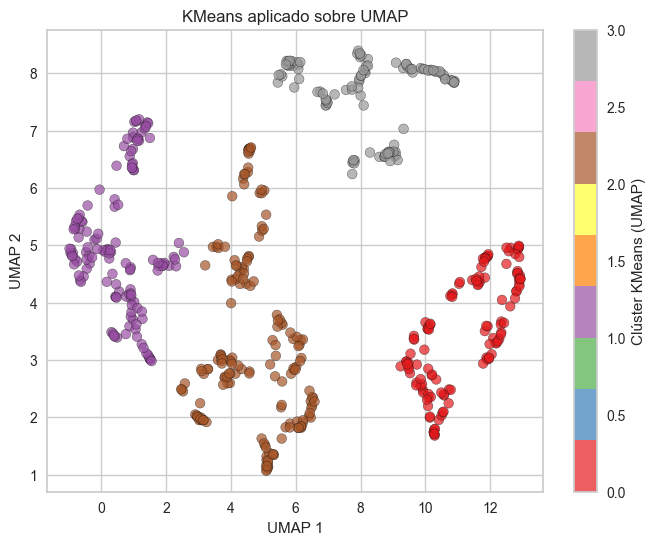

In [27]:
# Añadir los nuevos clusters al DataFrame original
df_color_mm['Cluster_UMAP'] = cluster_color_mm_umap.labels_

# Visualización con los nuevos clústeres
plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_mm[:, 0], X_umap_mm[:, 1],
    c=df_color_mm['Cluster_UMAP'], cmap='Set1', edgecolor='k', alpha=0.7
)
plt.title('KMeans aplicado sobre UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster KMeans (UMAP)')
plt.grid(True)
plt.show()

In [28]:
pd.crosstab(df_color_mm['label'], df_color_mm['Cluster_UMAP'])

Cluster_UMAP,0,1,2,3
label,,,,
higher,55,86,79,48
smaller,72,52,87,58


In [29]:
silhouette_umap_mm = silhouette_score(X_umap_mm, cluster_color_mm_umap.labels_)
print(f"Índice de silueta (UMAP + KMeans): {silhouette_umap_mm:.3f}")

Índice de silueta (UMAP + KMeans): 0.566
